# Whether the client has subscribed a term deposit or not

## Importing libraries in Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print ("Importing libraries have been sucessful")

Importing libraries have been sucessful


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = time.time()

## Loading the dataset in Python

In [4]:
bank = pd.read_csv("bank-full.csv", delimiter=';')

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Preliminary data exploration

In [7]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Identification of missing values in the dataset

In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Identification of duplicate values in the dataset

In [10]:
bank.duplicated().sum()

0

### Identification of outliers in balance and age column

In [11]:
bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39028,39,blue-collar,single,primary,no,656,yes,no,cellular,18,may,190,6,-1,0,unknown,no
5755,35,admin.,married,secondary,no,788,yes,no,unknown,26,may,223,1,-1,0,unknown,no
27821,31,management,single,tertiary,no,581,yes,yes,cellular,28,jan,572,1,-1,0,unknown,no
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes
4115,57,management,married,primary,no,0,no,no,unknown,19,may,455,1,-1,0,unknown,no
4504,40,blue-collar,married,secondary,no,877,yes,no,unknown,20,may,207,6,-1,0,unknown,no
10763,44,management,married,tertiary,no,3091,yes,no,unknown,17,jun,331,4,-1,0,unknown,no
8176,34,services,married,secondary,no,798,yes,no,unknown,2,jun,304,2,-1,0,unknown,no
44284,27,technician,single,secondary,no,-69,no,no,unknown,26,jul,4,1,-1,0,unknown,no
4537,33,services,married,secondary,no,7,yes,no,unknown,20,may,217,1,-1,0,unknown,no


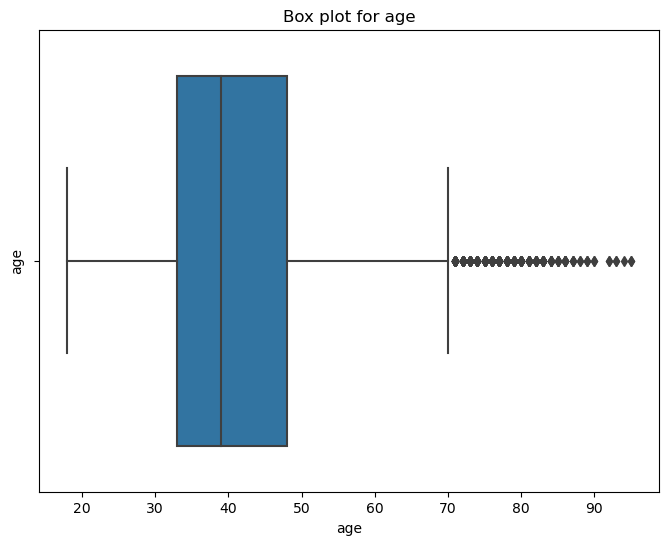

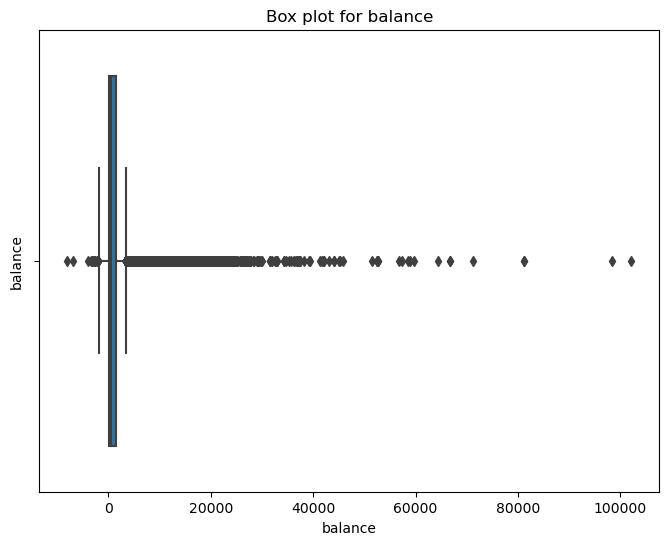

In [12]:
for i in bank[['age', 'balance']]:
    plt.figure(figsize = (8,6))
    sns.boxplot(data = bank[['age', 'balance']], x = i)
    plt.title(f"Box plot for {i}")
    plt.ylabel(i)
    plt.show()

### Removing outliers from the age column

In [13]:
q1 = bank['age'].quantile(0.25)
q3 = bank['age'].quantile(0.75)

In [14]:
IQR = q3-q1

In [15]:
upper_threshold = q3+1.5*IQR
lower_threshold = q1-1.5*IQR

In [16]:
upper_array = np.where(bank['age']>=upper_threshold)[0]
lower_array = np.where(bank['age']<=lower_threshold)[0]

In [17]:
bank.drop(index=upper_array, inplace=True)
bank.drop(index=lower_array, inplace=True)

#### Checking outliers after elimination of potential outliers

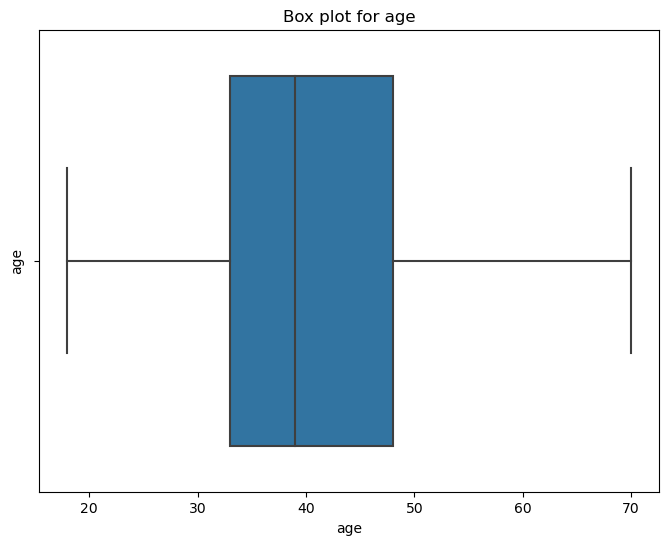

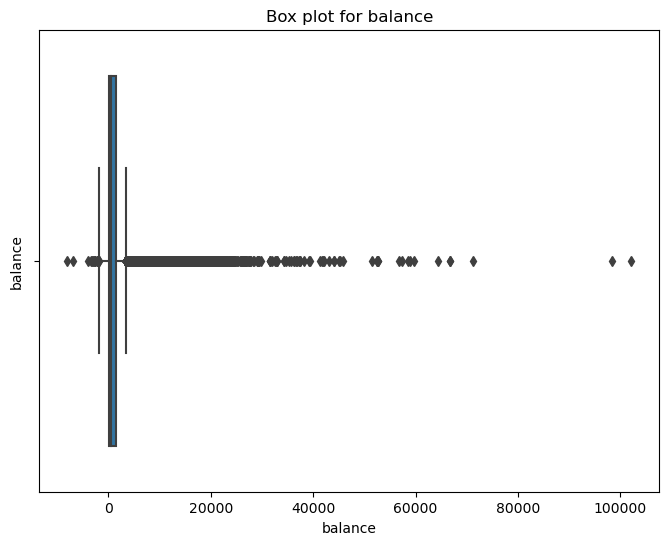

In [18]:
for i in bank[['age', 'balance']]:
    plt.figure(figsize = (8,6))
    sns.boxplot(data = bank[['age', 'balance']], x = i)
    plt.title(f"Box plot for {i}")
    plt.ylabel(i)
    plt.show()

### Exploratory data analysis

### Feature enginnering on job column

In [19]:
bank['job'].value_counts()

blue-collar      9729
management       9445
technician       7594
admin.           5168
services         4154
retired          1830
self-employed    1573
entrepreneur     1485
unemployed       1303
housemaid        1224
student           938
unknown           281
Name: job, dtype: int64

#### Droppig the columns with unknown job

In [20]:
bank = bank[bank['job'] != 'unknown']

In [21]:
bank['job'].value_counts()

blue-collar      9729
management       9445
technician       7594
admin.           5168
services         4154
retired          1830
self-employed    1573
entrepreneur     1485
unemployed       1303
housemaid        1224
student           938
Name: job, dtype: int64

### Feature Engineering on the 'education' column

<AxesSubplot:>

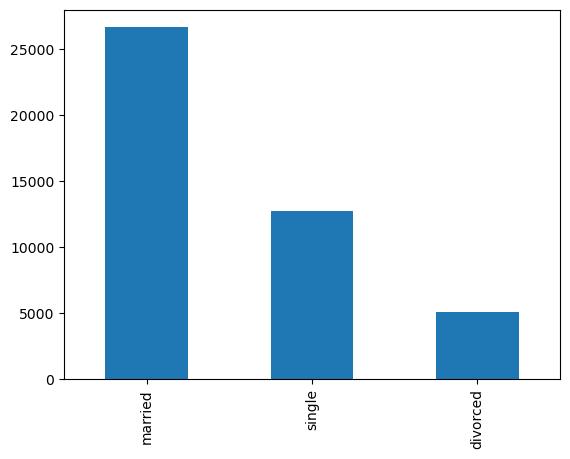

In [22]:
bank['marital'].value_counts().plot(kind = 'bar')

### Feature enginnering on education column

In [23]:
bank['education'].value_counts()

secondary    22999
tertiary     13177
primary       6583
unknown       1684
Name: education, dtype: int64

### Feature engineeing on default

In [24]:
bank['default'].value_counts()

no     43631
yes      812
Name: default, dtype: int64

### Feature Enginnering of Balance column

#### Histogram plot for balance

<Figure size 800x600 with 0 Axes>

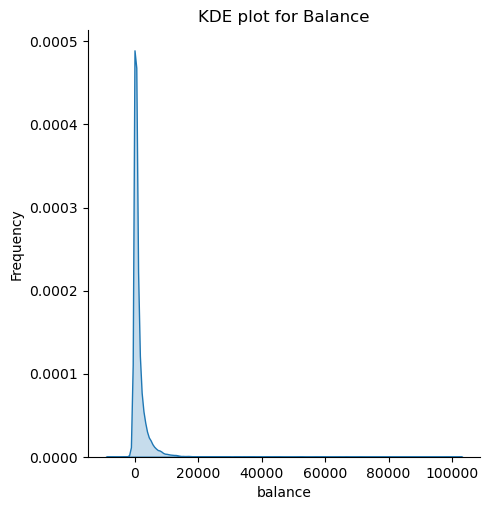

In [25]:
plt.figure(figsize = (8,6))
sns.displot(data = bank, x = 'balance', kind = 'kde', fill = True)
plt.title('KDE plot for Balance')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/KDE of balance.jpg")
plt.show()

### Distribution of balance across education level segmented by marital status

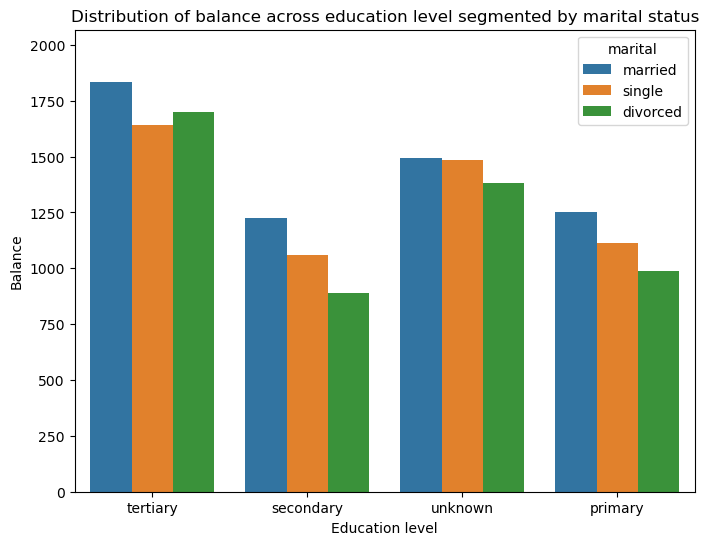

In [26]:
plt.figure(figsize = (8,6))
sns.barplot(data = bank, x = 'education', y = 'balance', hue = 'marital', dodge = True, errwidth = 0)
plt.title("Distribution of balance across education level segmented by marital status")
plt.xlabel('Education level')
plt.ylabel('Balance')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/Stacked bar chart.jpg")
plt.show()

### Distribution of duration of last contact

<Figure size 800x600 with 0 Axes>

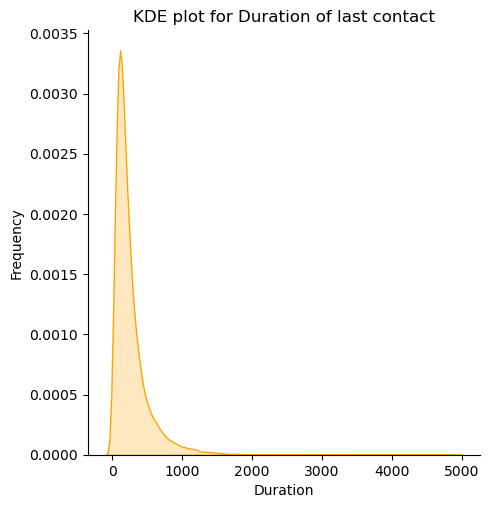

In [27]:
plt.figure(figsize = (8,6))
sns.displot(data = bank, x = 'duration', kind = 'kde', color = 'orange', fill = True)
plt.title('KDE plot for Duration of last contact')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/KDE of duration.jpg")
plt.show()

### Influence of number of campaigns on client subscribed a term deposit

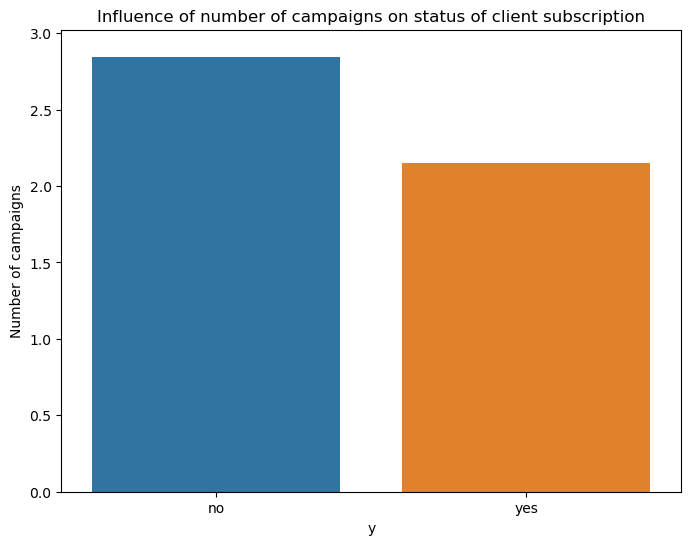

In [28]:
plt.figure(figsize = (8,6))
sns.barplot(data = bank, x = 'y', y = 'campaign', errwidth = 0)
plt.title("Influence of number of campaigns on status of client subscription")
plt.xlabel('y')
plt.ylabel('Number of campaigns')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/bar chart.jpg")
plt.show()

### Distribution of target variable (y) to observe class balance

In [29]:
bank ['y'].value_counts()

no     39404
yes     5039
Name: y, dtype: int64

## Machine Learning Modelling

### Things to perform

#### Target variable

#### For features

#### Data splitting

In [30]:
X = bank.drop(columns = ['contact', 'day', 'y'])

In [31]:
X

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,may,92,1,-1,0,unknown
5,35,management,married,tertiary,no,231,yes,no,may,139,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,nov,266,1,-1,0,unknown
45205,25,technician,single,secondary,no,505,no,yes,nov,386,2,-1,0,unknown
45206,51,technician,married,tertiary,no,825,no,no,nov,977,3,-1,0,unknown
45209,57,blue-collar,married,secondary,no,668,no,no,nov,508,4,-1,0,unknown


In [32]:
y = bank['y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [34]:
X_train.shape

(35554, 14)

In [35]:
X_test.shape

(8889, 14)

#### LabelEncoding for target column

In [36]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [37]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Logistic Regression Model

Accuracy of the Model is: 89.86%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7857
           1       0.65      0.28      0.39      1032

    accuracy                           0.90      8889
   macro avg       0.78      0.63      0.67      8889
weighted avg       0.88      0.90      0.88      8889



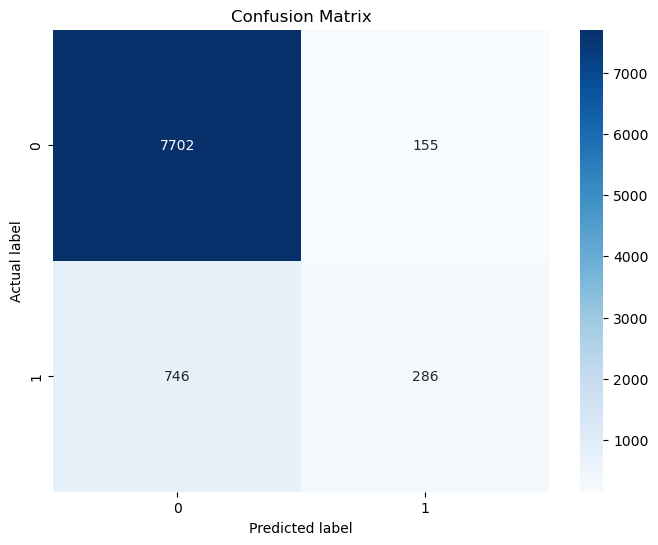

In [39]:
step1 = ColumnTransformer(transformers=[
    ('tnf1', MinMaxScaler(), ['age', 'balance', 'campaign', 'pdays', 'previous']),
    ('tnf2', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary'], 
                                        ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]), 
     ['education', 'month']),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
], remainder='passthrough')

step2 = LogisticRegression()
log_reg = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)*100
print (f'Accuracy of the Model is: {log_reg_accuracy:.2f}%')

log_reg_classification_report = classification_report(y_test, log_reg_pred)
print(log_reg_classification_report)

conf_matrix = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [40]:
end = time.time()

In [41]:
print(f'Total Time required (in seconds) is:  {(end-start):.2f} seconds')

Total Time required (in seconds) is:  3.67 seconds
